In [1]:
import scipy.io as sio
import sys
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Parses from a file that gives mapping from file names to labels
def parse_celeba_labels(path):
	f = open(path, 'r')
	count = 0
	file_to_label = {}
	for line in f:
		arr = line.split(" ")
		if len(arr) == 2:
			file_to_label[arr[0]] = int(arr[1].split("\n")[0])
	return file_to_label

# Returns data and corresponding labels
def get_celeb_a_dataset(path_data, path_labels):
	# Dictionary mapping file names to labels
	file_to_label = parse_celeba_labels(path_labels)
	f = open(path_data, 'r')

	# Skip first two lines of the file
	f.readline()
	f.readline()

	count = 0
	labels = []
	data = []
	for line in f:
		temp = []
		arr = line.split()
		for elem in arr[1:]:
			if int(elem) < 0:
				temp.append(0)
			else:
				temp.append(1)
		data.append(temp)
		labels.append(file_to_label[arr[0]])
	return data, labels

# Testing
data, labels = get_celeb_a_dataset("celeb_a_data.txt", "celeb_a_labels.txt")




In [3]:
print len(data)
print data[34]

202599
[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]


In [4]:
print len(labels)

202599


In [5]:
labels[2]
print distance.hamming(data[0], data[1])
print data[0]
print data[1]
print len(data[1])

0.225
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
40


In [6]:
dic = {}
count = 0
for elem in labels:
    if elem in dic:
        dic[elem].append(count)
    else:
        dic[elem] = [count]
    count += 1


In [7]:
dic

{1: [22,
  4505,
  6438,
  14041,
  15215,
  23003,
  24090,
  27826,
  30453,
  32403,
  33489,
  49380,
  51161,
  56278,
  64537,
  67806,
  67854,
  68168,
  87502,
  90780,
  108997,
  111432,
  112543,
  117149,
  130349,
  142585,
  142873,
  145589,
  157601],
 2: [16187, 51522, 68489, 86523, 111617, 112467, 142877, 155884],
 3: [3028,
  3205,
  8837,
  16810,
  16932,
  21232,
  24084,
  34629,
  43468,
  45832,
  47008,
  47988,
  67331,
  72784,
  79833,
  93255,
  95761,
  110392,
  113789,
  121748,
  122081,
  128411,
  135807,
  147877,
  161021],
 4: [8267,
  22542,
  22851,
  27098,
  56601,
  56783,
  64664,
  67357,
  83616,
  86983,
  95307,
  101387,
  107917,
  112900,
  118076,
  122189,
  122208,
  131417,
  143742,
  147011,
  150947,
  153728],
 5: [455,
  18770,
  38781,
  44155,
  53287,
  58155,
  66342,
  69569,
  73113,
  85545,
  93186,
  93950,
  100299,
  101048,
  107858,
  144160,
  145807,
  147009,
  154499,
  157059],
 6: [2616,
  3288,
  4316,
  

In [8]:
def calculate_distance(i,j):
    return distance.hamming(data[i], data[j])

In [9]:
same_distance = []
for same in dic:
    i = 0
    while i < len(dic[same]):
        j = i + 1
        while j < len(dic[same]):
            same_distance.append(calculate_distance(dic[same][i], dic[same][j]))
            j += 1
        i += 1


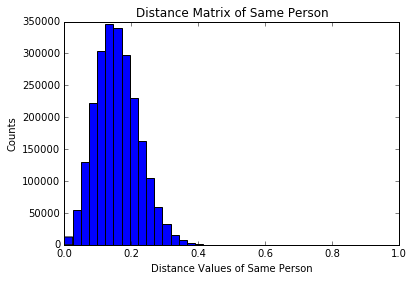

In [15]:
plt.hist(same_distance, bins = 41, range = [0,1])
plt.title("Distance Matrix of Same Person")
plt.xlabel("Distance Values of Same Person")
plt.ylabel("Counts")
plt.show()

In [16]:
same_array = dic.keys()

In [ ]:
different_distance = []
i = 0
while i < len(same_array):
    j = i + 1
    while j < len(same_array):
        for elem1 in dic[same_array[i]]:
            for elem2 in dic[same_array[j]]:
                different_distance.append(calculate_distance(elem1, elem2))
        j += 1
    i += 1


In [ ]:
len(same_array)

In [ ]:
plt.hist(different_distance, bins = 41, range = [0,1])
plt.title("Distance Matrix of Same Person")
plt.xlabel("Distance Values of Same Person")
plt.ylabel("Counts")
plt.show()